importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

carregando o csv

In [2]:
OVNIS_EUA = pd.read_csv('../5.4-Exploracao-dos-dados-com-SQL/OVNIS_EUA.csv')
OVNIS_EUA.head()

date_time             city state      shape     duration  \
0  9/22/97 20:00  Solomons Island    MD       Disk   10 minutes   
1        9/19/97     Garden Grove    CA  Rectangle      4 mins.   
2  9/18/97 20:15      Panama City    FL    Unknown   30 seconds   
3  9/15/97 00:00          Houston    TX       Disk    5 minutes   
4  9/15/97 20:00         Santa Fe    NM      Light  2-3 minutes   

                                             summary   posted  
0              Close up at twilight, Stationary UFO.   8/5/09  
1  Around 6:30 PM I was walking through a Vons Pa...  12/1/19  
2  Looked like stars in the sky so far up/moveing...  3/13/12  
3  Beautiful silver-colored flying saucer about t...  7/19/10  
4  Saw white dot of light moving in zig-zag motio...  11/9/17

Gráficos de barras agrupadas e barras empilhadas dos quatro estados que possuem a maior frequência de relatos e os tipos de OVNIs mais populares

In [19]:
# Quantidade de relatos por estado em ordem decrescente
qtd_relatos_estados = OVNIS_EUA.state.value_counts().to_frame().reset_index()
qtd_relatos_estados.columns = ['estado', 'relatos']

# 4(quatro) estados com a maior frequência de relatos
GBA_ESTADOS = qtd_relatos_estados.head(4)['estado'].values
GBA_ESTADOS

array([&#39;CA&#39;, &#39;FL&#39;, &#39;WA&#39;, &#39;TX&#39;], dtype=object)

OVNIs mais populares

In [20]:
OVNIS_EUA['count'] = 1
shapes_group = OVNIS_EUA.groupby(['shape']).count()['count']
shapes_group = shapes_group.sort_values(axis=0, ascending=False).reset_index()

shapes_group.columns = ['Forma', 'Total']

GBA_SHAPES = shapes_group.head(4)
GBA_SHAPES

Forma  Total
0     Light  13932
1    Circle   7455
2  Triangle   5940
3  Fireball   5910

In [22]:
GRL = pd.DataFrame()

for i in GBA_ESTADOS:
    formas = OVNIS_EUA.query("state == '"+ i + "'").loc[:, ['state', 'shape']].reset_index(drop = True)
    formas = formas.query("shape == 'Light' | shape == 'Circle' | shape == 'Triangle' | shape == 'Fireball'").reset_index(drop = True)
    formas = formas.value_counts().to_frame().reset_index()
    formas.columns = ['state', 'shape', 'relatos']
    GRL = GRL.append(formas).reset_index(drop= True)

In [23]:
luz = GRL.query("shape == 'Light'").loc[:, ['state','relatos']].reset_index(drop=True)
circle = GRL.query("shape == 'Circle'").loc[:, ['state','relatos']].reset_index(drop=True)
triangle = GRL.query("shape == 'Triangle'").loc[:, ['state','relatos']].reset_index(drop=True)
fireball = GRL.query("shape == 'Fireball'").loc[:, ['state','relatos']].reset_index(drop=True)
fireball

state  relatos
0    CA      703
1    FL      541
2    WA      296
3    TX      183

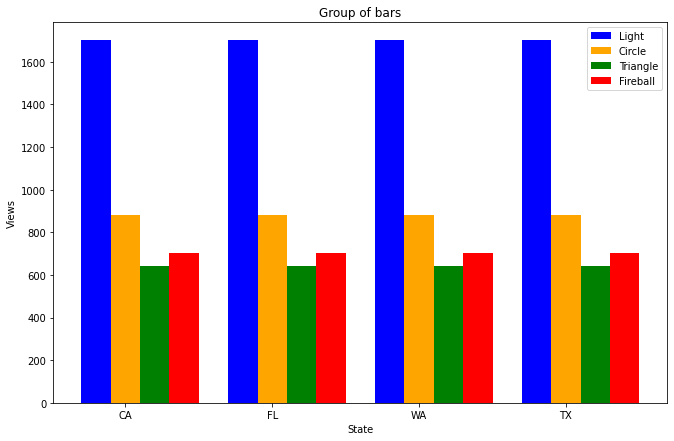

In [24]:
grupos = [1,3,5,7]
plt.rcParams['figure.figsize'] = (11,7)
fig, ax = plt.subplots()
bar_larg = 0.4

for i in grupos:
    p1 = ax.bar(i, luz['relatos'], bar_larg, color='blue')
    p2 = ax.bar(i + bar_larg, circle['relatos'], bar_larg, color='orange')
    p3 = ax.bar(i + bar_larg*2, triangle['relatos'], bar_larg, color='green')
    p4 = ax.bar(i + bar_larg*3, fireball['relatos'], bar_larg, color='red', label='Fireball')

plt.xlabel('State') 
plt.ylabel('Views') 
ax.set_title('Group of bars') 
ax.set_xticks([r + bar_larg for r in grupos])
ax.set_xticklabels(('CA', 'FL', 'WA', 'TX')) 
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('Light', 'Circle', 'Triangle', 'Fireball'))
plt.show()

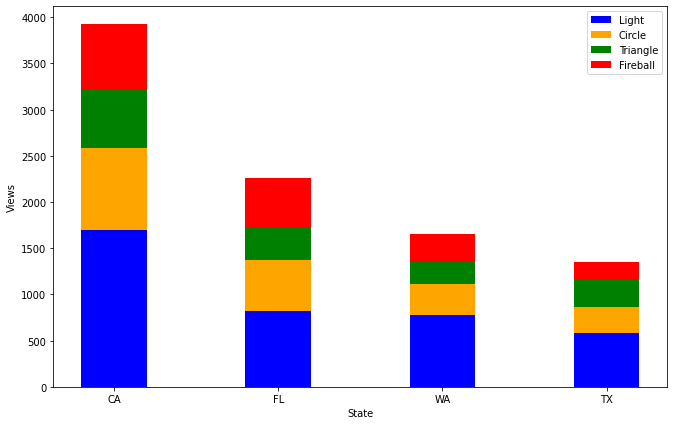

In [25]:
fig, ax = plt.subplots()
grupo2 = 4
bar_larg = 0.4

index = np.arange(grupo2)

p1 = ax.bar(index, luz['relatos'], bar_larg, color='blue')
p2 = ax.bar(index, circle['relatos'], bar_larg, color='orange', bottom=luz['relatos'])
p3 = ax.bar(index, triangle['relatos'], bar_larg, color='green', bottom=luz['relatos']+circle['relatos'])
p4 = ax.bar(index, fireball['relatos'], bar_larg, color='red', label='Fireball', bottom=luz['relatos']+circle['relatos']+triangle['relatos'])

plt.xlabel('State') 
plt.ylabel('Views') 
ax.set_xticks(index)
ax.set_xticklabels(('CA', 'FL', 'WA', 'TX')) 
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('Light', 'Circle', 'Triangle', 'Fireball'))
plt.show()

# Criação de Maps

In [39]:
from pprint import pprint
import zipcodes

In [156]:
cidades_eua = OVNIS_EUA.loc[:, ['city', 'state']]
cidades = cidades_eua.values

In [157]:
registros = []
for city in cidades:
    registros.append(zipcodes.filter_by(city=city[0], state=city[1]))

In [ ]:
df = pd.DataFrame()
for citys in registros:
    for r in  citys:
        df = df.append(r, ignore_index=True)

In [163]:
df

acceptable_cities  active  area_codes          city country  \
0                     []     1.0  [657, 714]  Garden Grove      US   
1                     []     1.0  [657, 714]  Garden Grove      US   
2                     []     1.0       [714]  Garden Grove      US   
3                     []     1.0  [714, 657]  Garden Grove      US   
4                     []     1.0  [657, 714]  Garden Grove      US   
...                  ...     ...         ...           ...     ...   
149313                []     1.0       [571]    Alexandria      US   
149314                []     1.0       [571]    Alexandria      US   
149315                []     0.0       [571]    Alexandria      US   
149316                []     1.0       [571]    Alexandria      US   
149317    [Beaver Creek]     1.0       [970]          Avon      US   

                 county      lat       long state             timezone  \
0         Orange County  33.7886  -117.9277    CA  America/Los_Angeles   
1         Orange County  33.7884  -117.9832    CA  America/Los_Angeles   
2         Orange County  33.7875  -117.9332    CA  America/Los_Angeles   
3         Orange County  33.7534  -117.9245    CA  America/Los_Angeles   
4         Orange County  33.7595  -117.9739    CA  America/Los_Angeles   
...                 ...      ...        ...   ...                  ...   
149313  Alexandria City  38.8049   -77.0475    VA     America/New_York   
149314  Alexandria City  38.8049   -77.0475    VA     America/New_York   
149315  Alexandria City     38.8     -77.04    VA     America/New_York   
149316                   38.7996   -77.0492    VA     America/New_York   
149317     Eagle County  39.6216  -106.4950    CO       America/Denver   

           unacceptable_cities world_region zip_code zip_code_type  
0                           []           NA    92840      STANDARD  
1                           []           NA    92841      STANDARD  
2                           []           NA    92842        PO BOX  
3                           []           NA    92843      STANDARD  
4                           []           NA    92844      STANDARD  
...                        ...          ...      ...           ...  
149313       [Us Army Mat Com]           NA    22333        UNIQUE  
149314        [Sun Trust Bank]           NA    22334        UNIQUE  
149315    [Woodward &amp; Lothrop]           NA    22336        UNIQUE  
149316  [Dept Of Defense, Dod]           NA    22350        UNIQUE  
149317                      []           NA    81620        PO BOX  

[149318 rows x 14 columns]

In [164]:
df_latitude_long = df.loc[:, ['state', 'city', 'lat', 'long']]
df_latitude_long.head(30)

state          city      lat       long
0     CA  Garden Grove  33.7886  -117.9277
1     CA  Garden Grove  33.7884  -117.9832
2     CA  Garden Grove  33.7875  -117.9332
3     CA  Garden Grove  33.7534  -117.9245
4     CA  Garden Grove  33.7595  -117.9739
5     CA  Garden Grove  33.7830  -118.0269
6     CA  Garden Grove  33.7875  -117.9332
7     FL   Panama City  30.1614   -85.6688
8     FL   Panama City  30.1588   -85.6603
9     FL   Panama City  30.0370   -85.5384
10    FL   Panama City  30.1909   -85.5022
11    FL   Panama City  30.2040   -85.6722
12    FL   Panama City  30.1588   -85.6603
13    FL   Panama City  30.1546   -85.7594
14    FL   Panama City  30.3377   -85.7176
15    FL   Panama City  30.1588   -85.6603
16    FL   Panama City  30.1588   -85.6603
17    FL   Panama City  30.1588   -85.6603
18    TX       Houston  29.7634   -95.3634
19    TX       Houston  29.7502   -95.3677
20    TX       Houston  29.7488   -95.3438
21    TX       Houston  29.7272   -95.3618
22    TX       Houston  29.7174   -95.4187
23    TX       Houston  29.7396   -95.3883
24    TX       Houston  29.7704   -95.4106
25    TX       Houston  29.7983   -95.4191
26    TX       Houston  29.7923   -95.3688
27    TX       Houston  29.7537   -95.3596
28    TX       Houston  29.7418   -95.3094
29    TX       Houston  29.7237   -95.2592

In [ ]:
df_latitude_long.to_csv('LatiLongTheCitys.csv')

In [3]:
df_latitude_long = pd.read_csv('LatiLongTheCitys.csv')
coordenadas = df_latitude_long.loc[:, ['lat', 'long']].values
coordenadas

array([[  33.7886, -117.9277],
       [  33.7884, -117.9832],
       [  33.7875, -117.9332],
       ...,
       [  38.8   ,  -77.04  ],
       [  38.7996,  -77.0492],
       [  39.6216, -106.495 ]])

In [4]:
import folium
from folium import plugins
from folium.plugins import HeatMap

eua = folium.Map(
    location=[37.0902, -95.7129],    # Coordenadas retiradas do Google Maps
    zoom_start=4
)

In [9]:
#brasil
eua.add_child(plugins.HeatMap(coordenadas))

&lt;folium.folium.Map at 0x2116bff3fd0&gt;

In [5]:
coordenadas_CA = df_latitude_long.query("state == 'CA'").loc[:, ['lat', 'long']].values
coordenadas_CA

array([[  33.7886, -117.9277],
       [  33.7884, -117.9832],
       [  33.7875, -117.9332],
       ...,
       [  37.6392, -120.9958],
       [  33.6636, -117.5894],
       [  33.6312, -117.5516]])

In [6]:
ca = folium.Map(
    location=[35.1258000, -117.9859000],    # Coordenadas retiradas do Google Maps
    zoom_start=6
)

In [7]:
ca.add_child(plugins.HeatMap(coordenadas_CA))
ca

&lt;folium.folium.Map at 0x1d76e8a1b20&gt;